
3.	Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from this:
Dataset: Nationwide Russian electign poll data from March 04, 2024
Dataset Description:
This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The data offers various insights but does not align with the official election results, You are encouraged to create your notebooks and delve into the data for further exploration.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv(r"D:\PWskills\assign\solutions\projects-assignment\EDA assginmets\russia dataset.csv")
df.head(2)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   int64  
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [5]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [6]:
df['job_type'].isnull().sum()

908

Age distribution

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


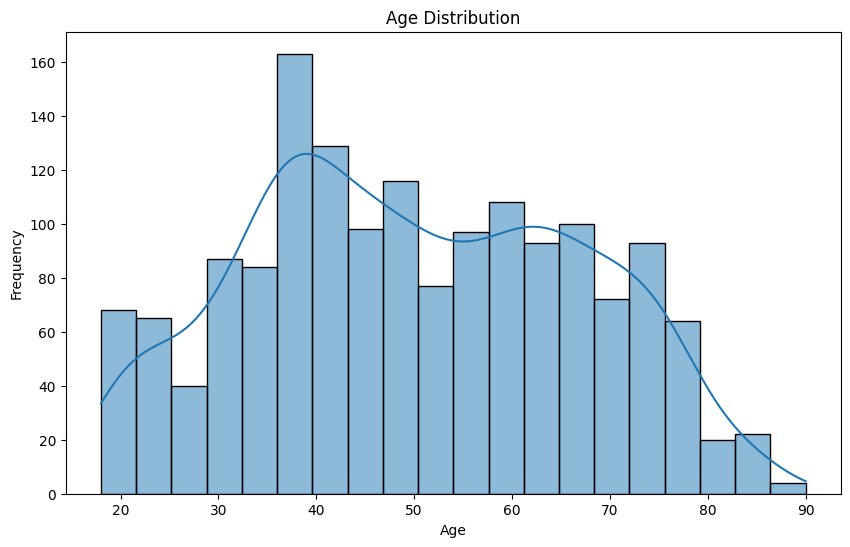

In [7]:
#age  distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


We can see that the number of people of age 30 to 70 are more in the dataset. 

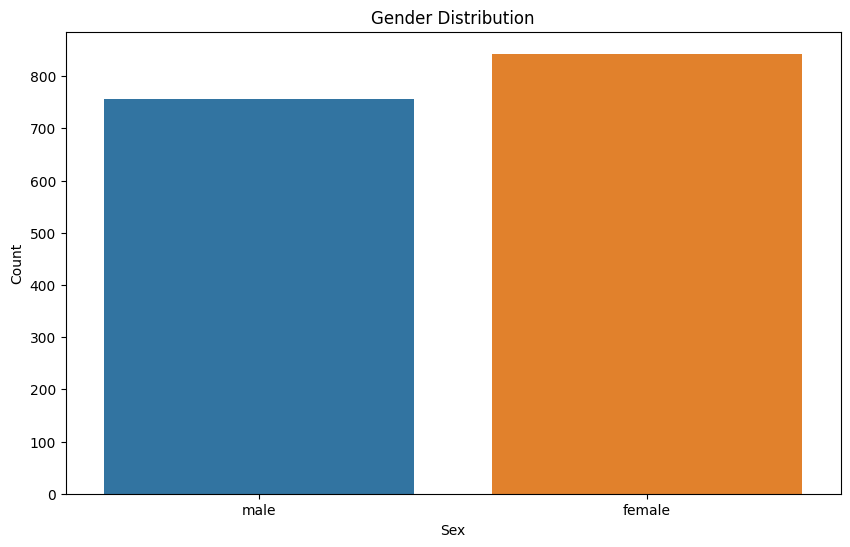

In [8]:
#gender distribution

plt.figure(figsize=(10,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

We can see that there are more number of femal population than male.

In [9]:
#gender distrubution in pie chart

male_percent=df['sex']=='male'
femlae_percentage=df['sex']=='female'
print('Number of male population in dataset',male_percent.sum())
print('Number of female population in dataset',femlae_percentage.sum())

Number of male population in dataset 757
Number of female population in dataset 843


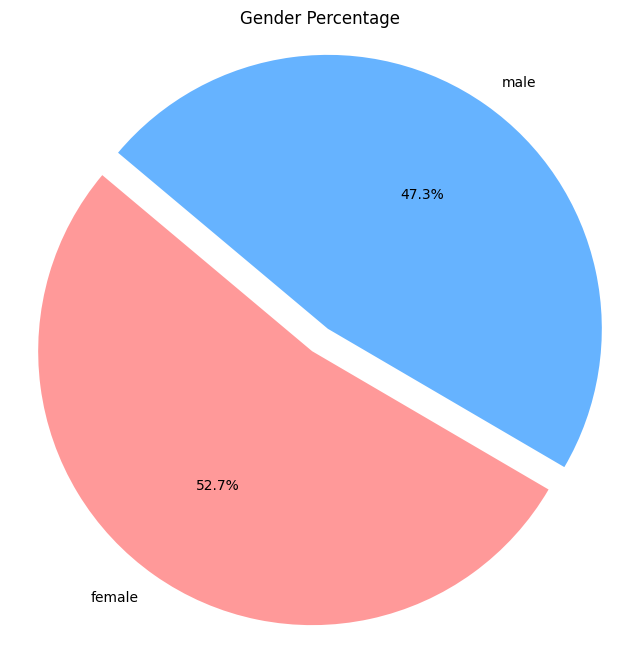

In [10]:

# Calculate the percentage of each gender
gender_counts = df['sex'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Define the explode parameter
explode = (0.1, 0)  

# Plot the pie chart with separation
plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], explode=explode)
plt.title('Gender Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


From the above dataset we see that out of total population 52.7% are female and 47.3 are male.

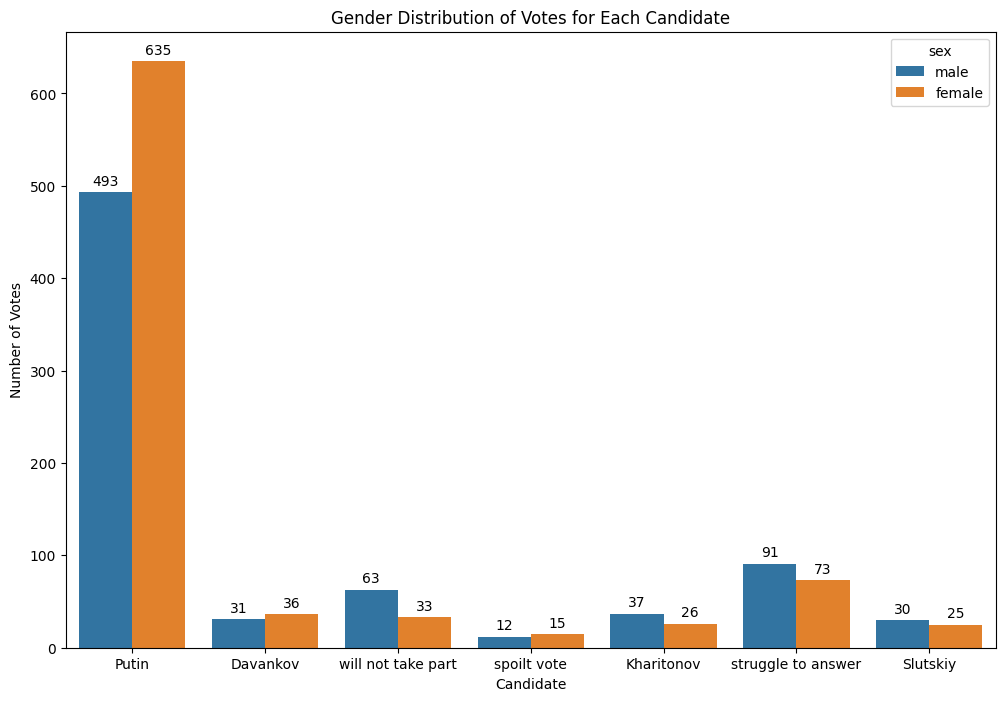

In [11]:
# Plot Gender vs. Candidate


plt.figure(figsize=(12, 8))
ax = sns.countplot(x='candidate', hue='sex', data=df)
plt.title('Gender Distribution of Votes for Each Candidate')
plt.xlabel('Candidate')
plt.ylabel('Number of Votes')

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


From the plot we can conclude that as there are more female population in dataset[df], more female voters voted to puting and also most of the male voted to putim. But we can also see that More number of men are struggling to answer.

Comparatively male voters voted more for 'kharitonov' than female,  'kharitonov' is secont most voted canditate after putin.

Being less in number male population, 63 male voters are not interested to vote for anybody.This concludes that female's shown more active participation in election.

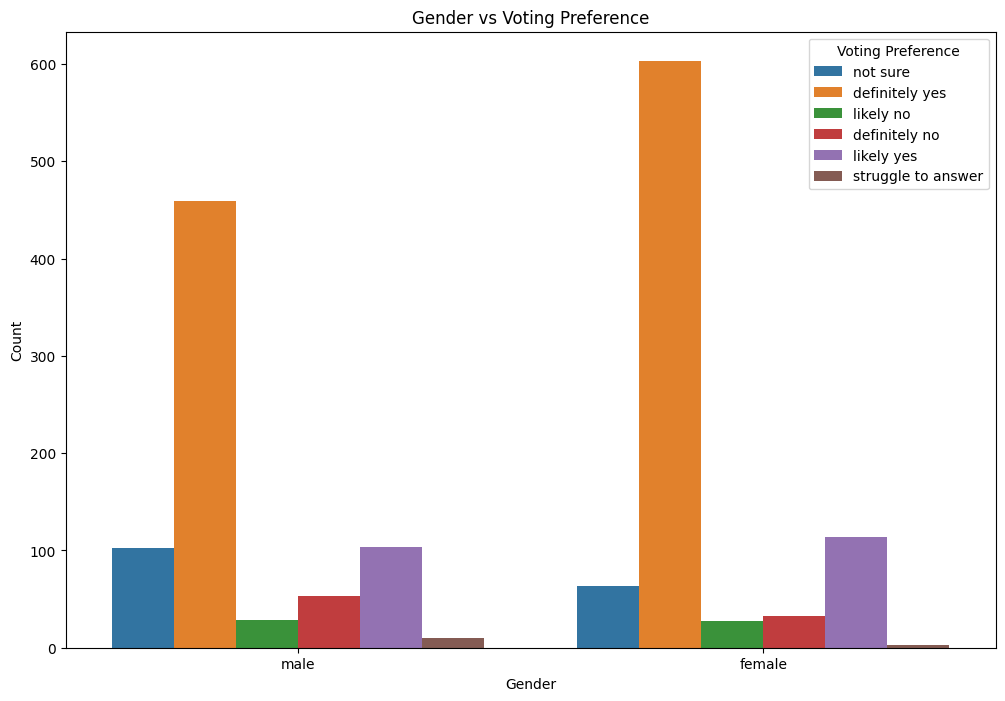

In [12]:
# 'Gender vs Voting Preference
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', hue='will_vote', data=df)
plt.title('Gender vs Voting Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Voting Preference')
plt.show()
# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

From above plot come to know that both male and female voters are in good number to cast their vote. But we can also see that more number of male is not sure to cast their vote, also more number both voters are in category of 'likely yes', which means they may vote or not but not still sure.

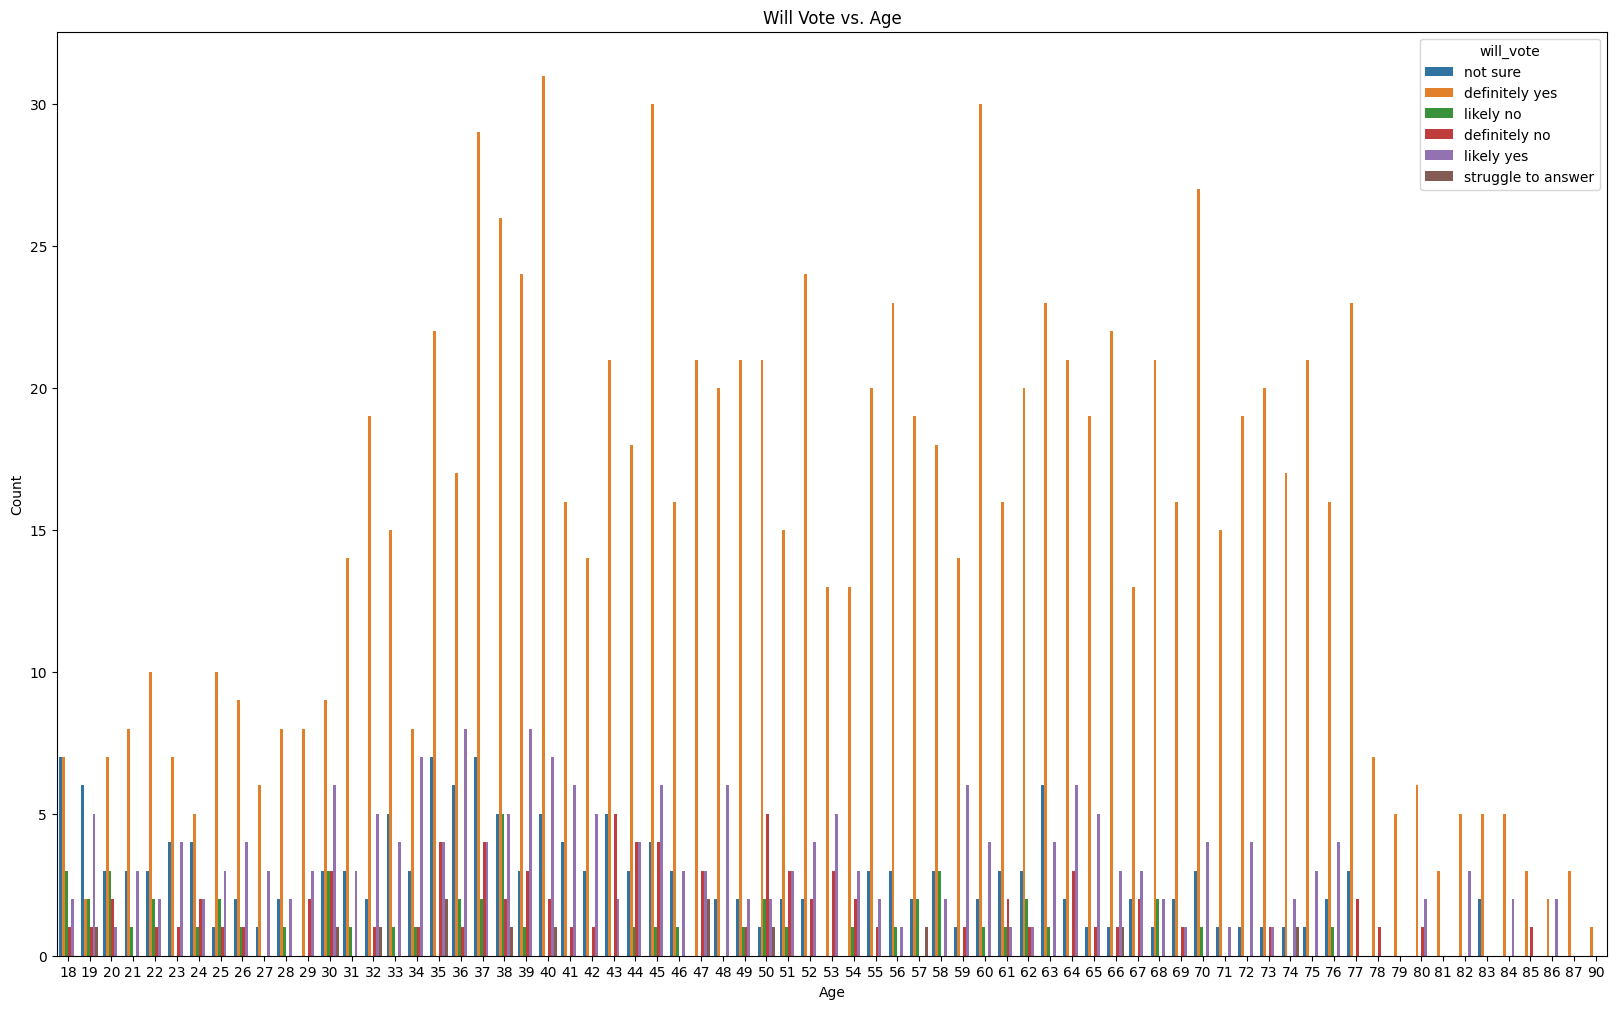

In [13]:
# Will Vote vs. Age
plt.figure(figsize=(20, 12))
sns.countplot(x='age', hue='will_vote', data=df)
plt.title('Will Vote vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We can see that the people of age 31 to 77 have the highest number of confident voters in the election.
We can see thta more number of age 19 are not sure for voting.
As we go from age 78 to 90 slowly the number of voters are decreasing. This may be due to most of the people of life span of old age population or it may be also old age population are not interested in survey

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


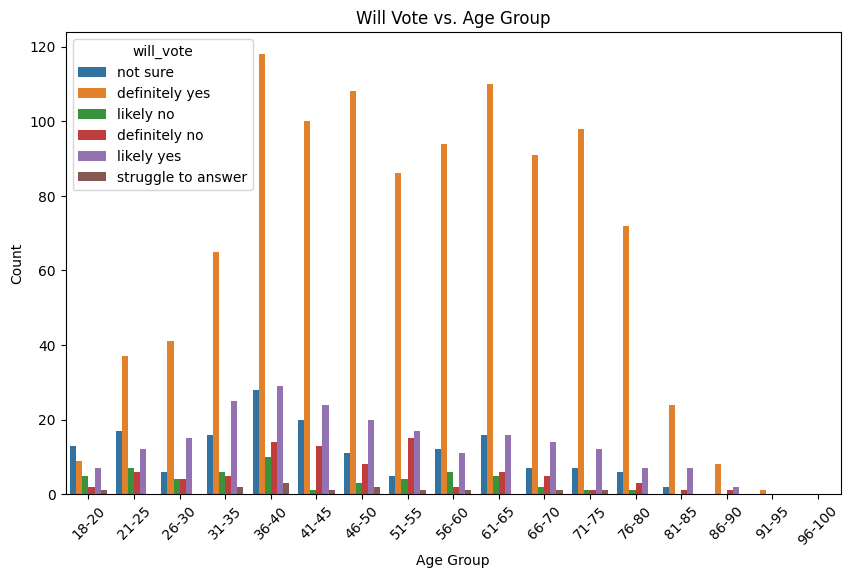

In [14]:
# Plot of Will Vote vs. Age Group

# Create age bins
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Plot Will Vote vs. Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='will_vote', data=df)
plt.title('Will Vote vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


We see that the age group of 36-40 is more interested to cast the vote. 
We also see that age group of 18-20 is not intereseted to cast their vote.
Very less nuber of people in all age group is not interested to cst their vote.

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


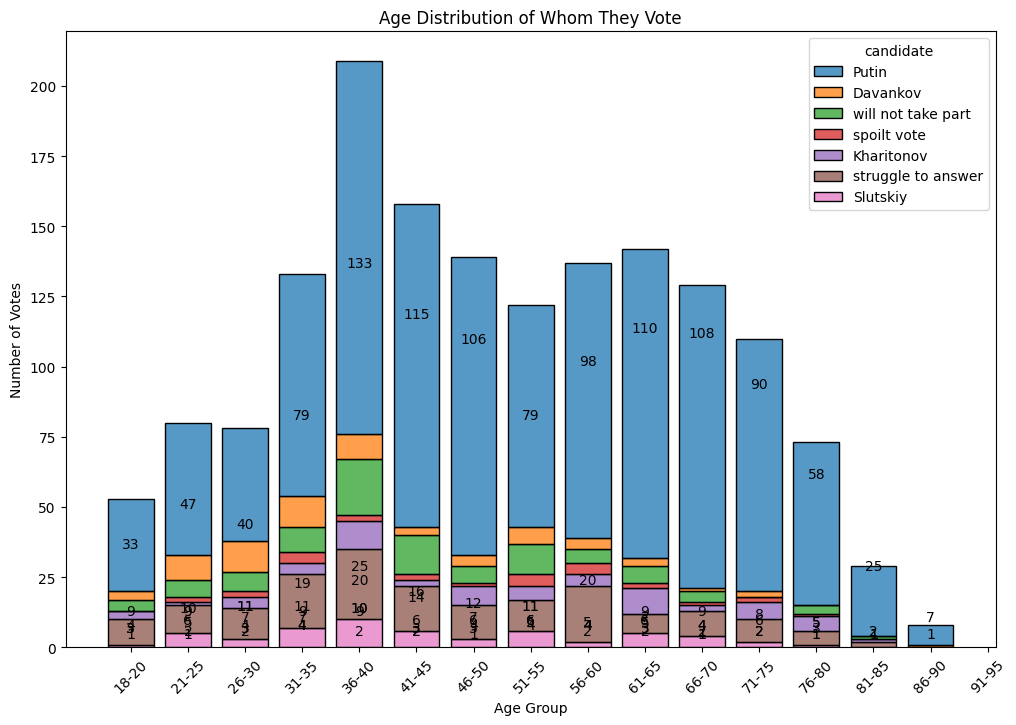

In [15]:
# 'Age Distribution of Whom They Vote'
# Create age bins
age_bins = [18, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]
age_labels = ['18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Plot Age Distribution of Whom They Vote
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='age_group', hue='candidate', multiple='stack', shrink=0.8)
plt.title('Age Distribution of Whom They Vote')
plt.xlabel('Age Group')
plt.ylabel('Number of Votes')

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()


From the above plot we get that.
The population of all age group have voted for Putin.
Very few amout of people in all age group is not interested to vote.
Age group of 36-40 has more number of voters, compared to all other.


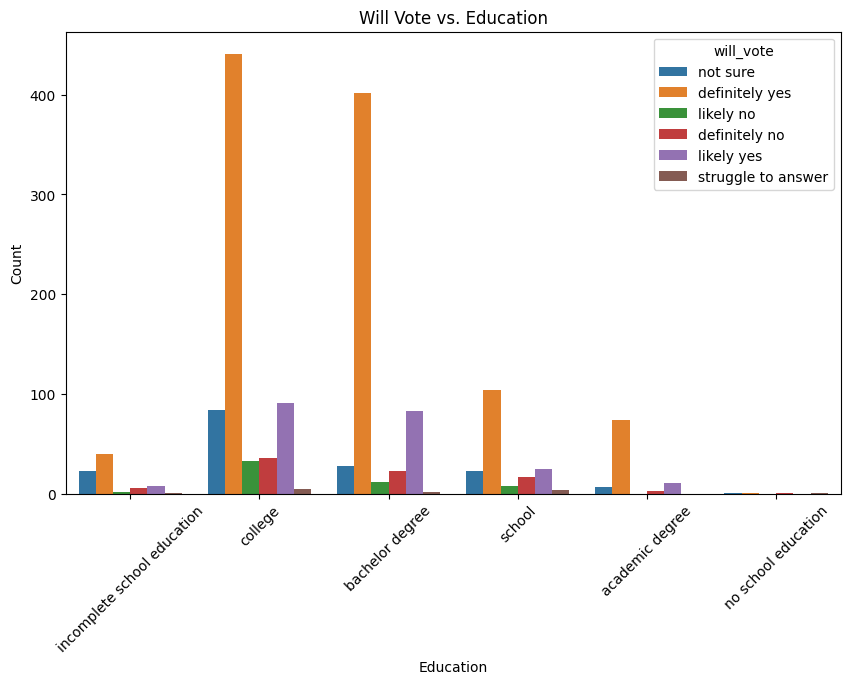

In [16]:
# plot of ('Will Vote vs. Education'

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='will_vote', data=df)
plt.title('Will Vote vs. Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the above plot we can see that 
People with college have more participation in voting,
People with no school education have very less participation [it may be because that there are very less number of people who has no school education or they dont want to participate in election].
Some part of population with collage show high resistance for voting.

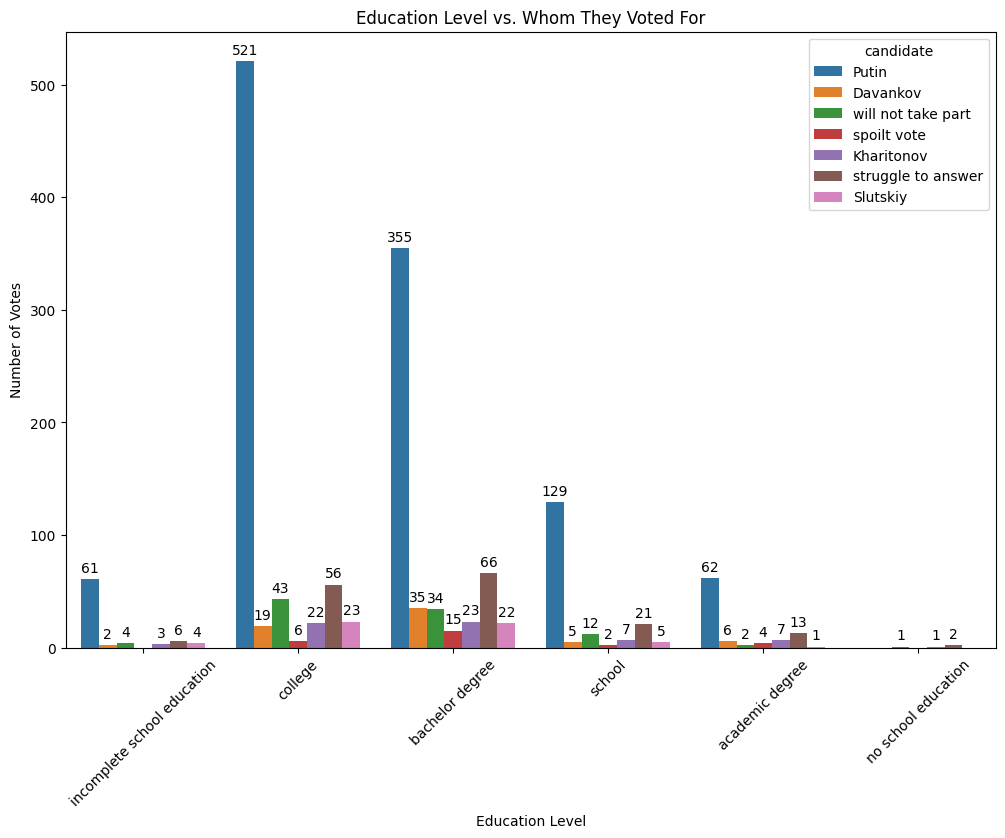

In [17]:
# Plot Education vs. Candidate


plt.figure(figsize=(12, 8))
ax = sns.countplot(x='education', hue='candidate', data=df)
plt.title('Education Level vs. Whom They Voted For')
plt.xlabel('Education Level')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


From above plot we witness that:
People with college voted for putin in highest number,
People with bachelor degree stands secont to vote for putin. 
people with no school education are very less but comparatively they voted more for 'kharatinov'

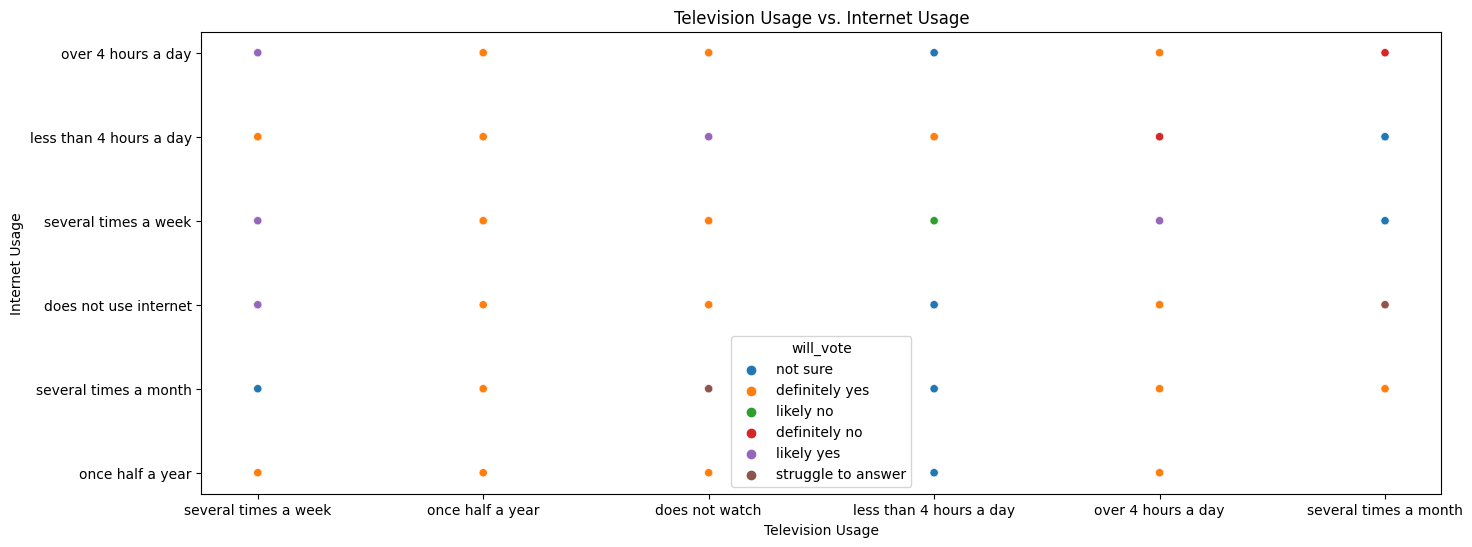

In [18]:

plt.figure(figsize=(16, 6))
sns.scatterplot(x='television_usage', y='internet_usage', hue='will_vote', data=df)
plt.title('Television Usage vs. Internet Usage')
plt.xlabel('Television Usage')
plt.ylabel('Internet Usage')
plt.show()


We see that almost all category with tv an internet consumption show strong support for voting.
But we also notice that people who watch tv over 4+ hrs and internet usage less than 4 hrs has shown strong resistance for voting.
similarly  we also notice that people who watch tv several times a month and over 4+ hrs of internet usage  has shown strong resistance for voting.


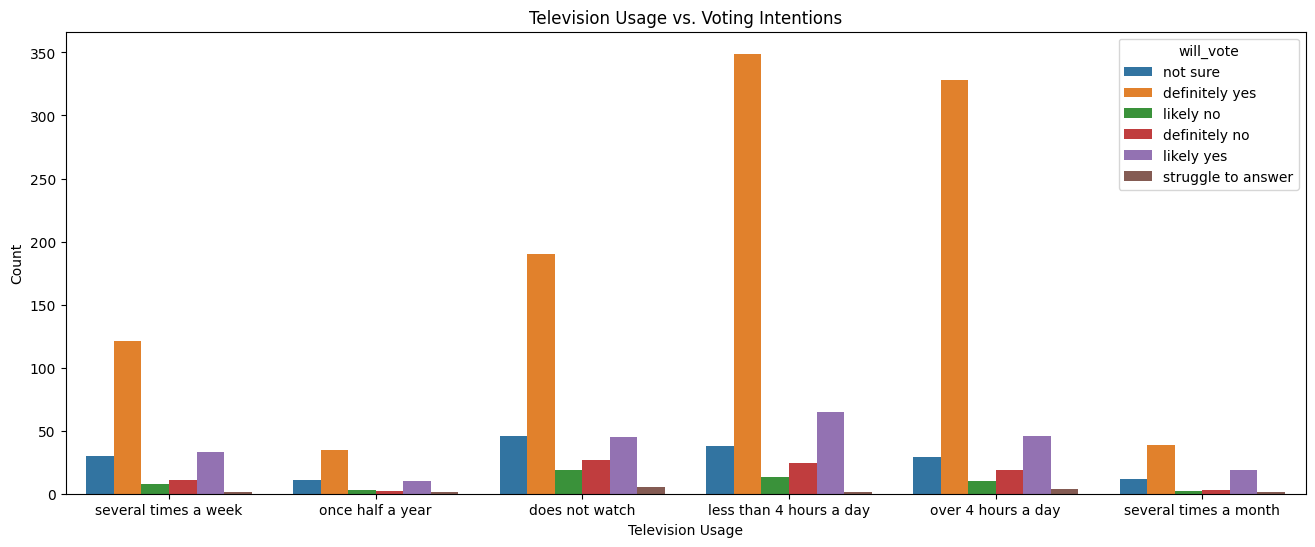

In [19]:
# Media Usage vs. Voting Intentions
plt.figure(figsize=(16, 6))
sns.countplot(x='television_usage', hue='will_vote', data=df)
plt.title('Television Usage vs. Voting Intentions')
plt.xlabel('Television Usage')
plt.ylabel('Count')
plt.show()

From the above plot we see that,
People who watch tv less and more than 4 hrs a day has highest voting participation.
People who watch tv several times a month and once half a year show very less voting participation.

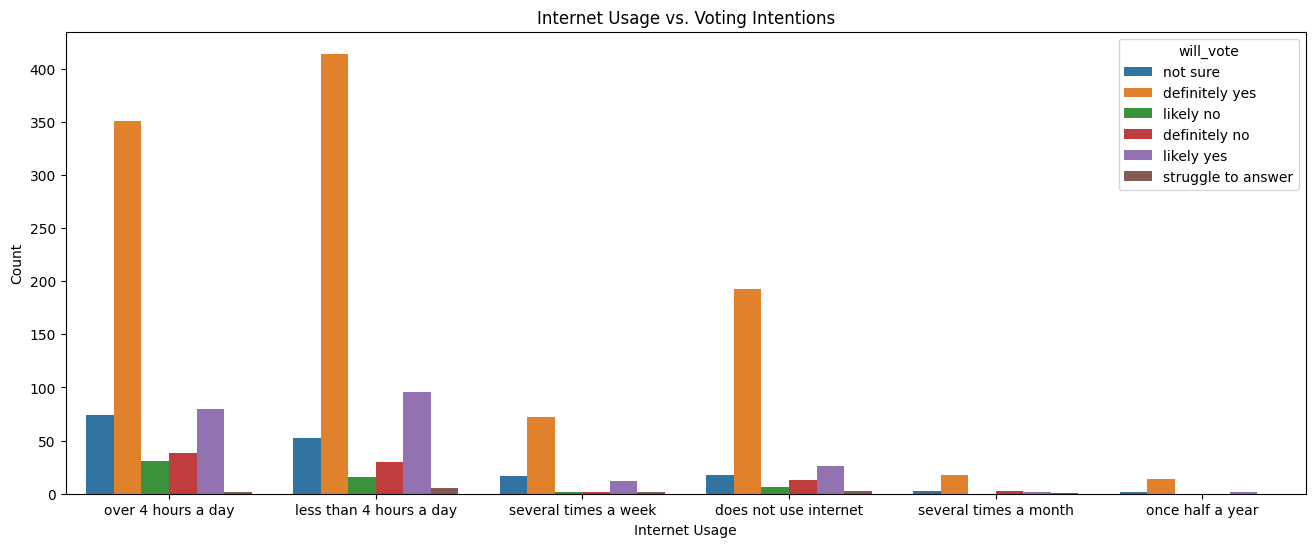

In [20]:
# Internet Usage vs. Voting Intentions'
plt.figure(figsize=(16, 6))
sns.countplot(x='internet_usage', hue='will_vote', data=df)
plt.title('Internet Usage vs. Voting Intentions')
plt.xlabel('Internet Usage')
plt.ylabel('Count')
plt.show()

From the above plot we see that,
People who use internet less and more than 4 hrs a day has highest voting participation.
People who use internet  several times a month and once half a year show very less voting participation.

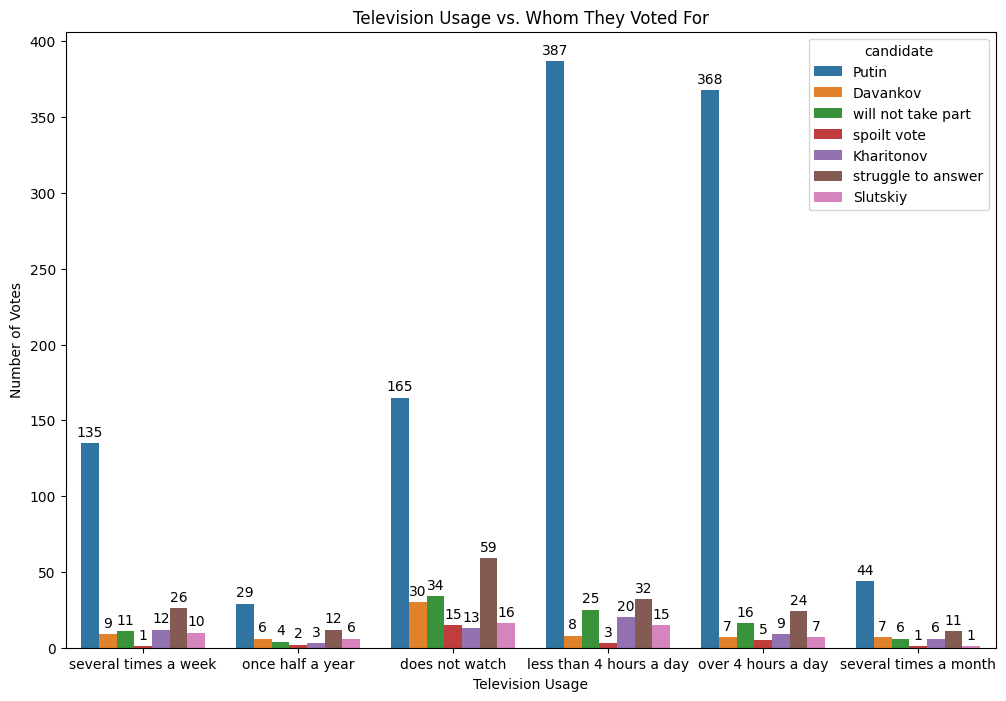

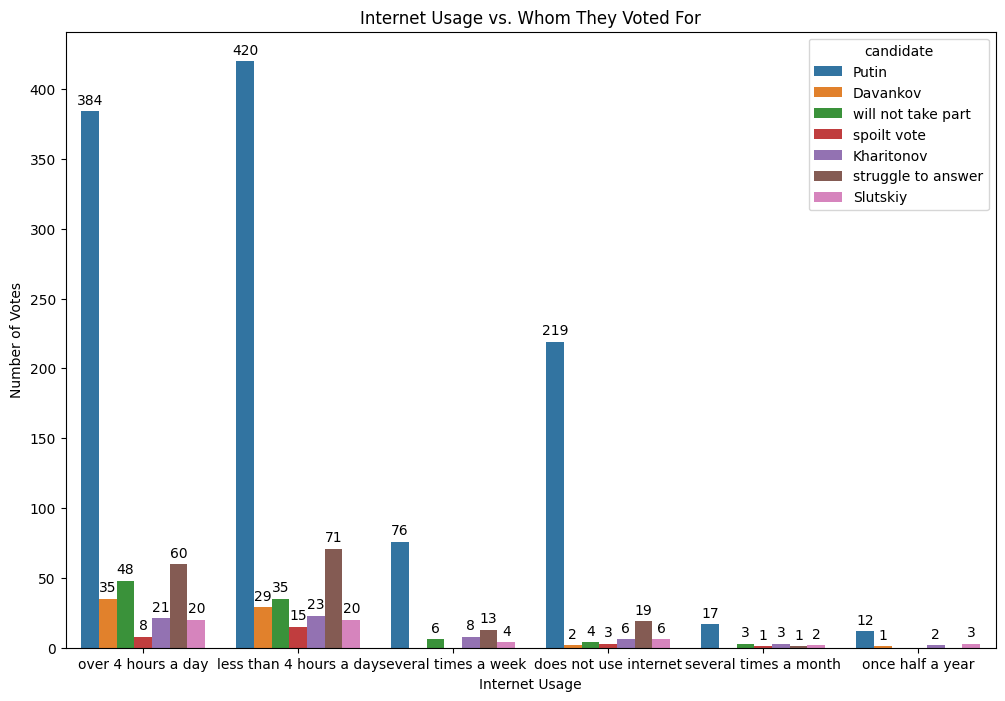

In [21]:

# Plot Television Usage vs. Whom They Voted For

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='television_usage', hue='candidate', data=df)
plt.title('Television Usage vs. Whom They Voted For')
plt.xlabel('Television Usage')
plt.ylabel('Number of Votes')

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot Internet Usage vs. Whom They Voted For
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='internet_usage', hue='candidate', data=df)
plt.title('Internet Usage vs. Whom They Voted For')
plt.xlabel('Internet Usage')
plt.ylabel('Number of Votes')

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


TV:
From the above plot we see that,
People who use T.v less and more than 4 hrs a day has voted putin.
people who dont watch tv also casted good amout of vote for putin.


Internet usage:
People who use Internet less and more than 4 hrs a day has voted putin.
people who dont use internet also casted good amout of vote for putin.



C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


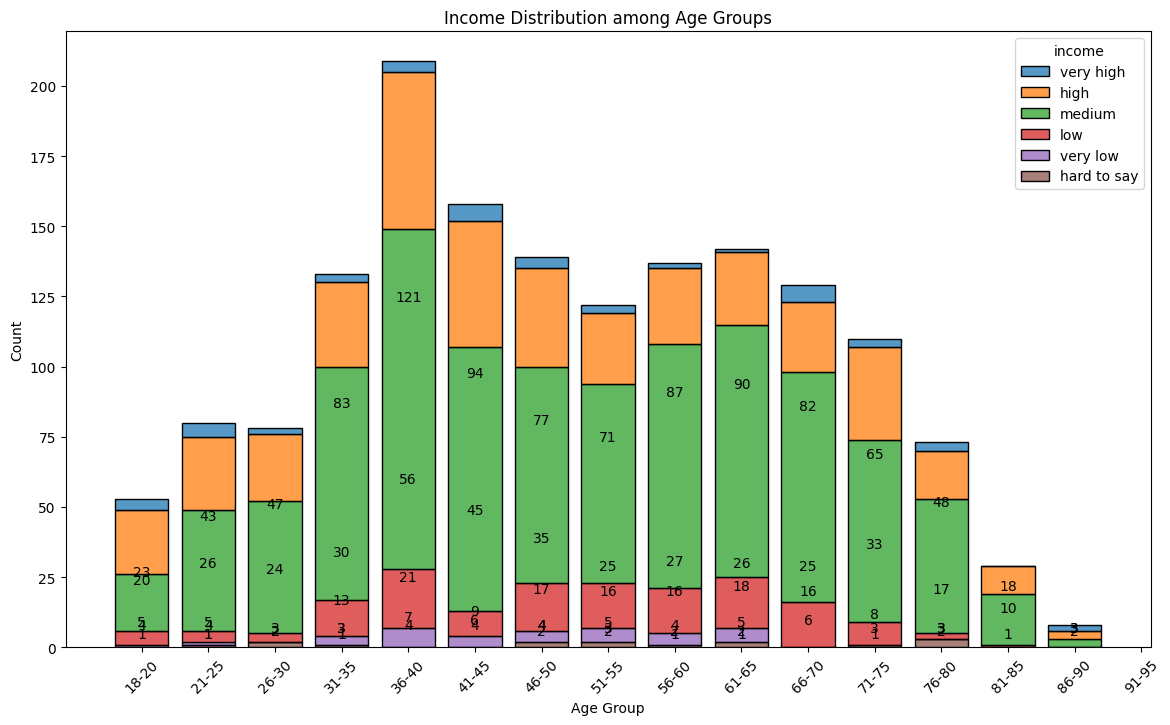

In [22]:


# Create age bins
age_bins = [18, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101]
age_labels = ['18-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Plot histogram of age group earning what income
plt.figure(figsize=(14, 8))
ax = sns.histplot(data=df, x='age_group', hue='income', multiple='stack', shrink=0.8)
plt.title('Income Distribution among Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


We see that majority of all the age group has the medium income range.
Age group of 36-40 has good number of high income people.

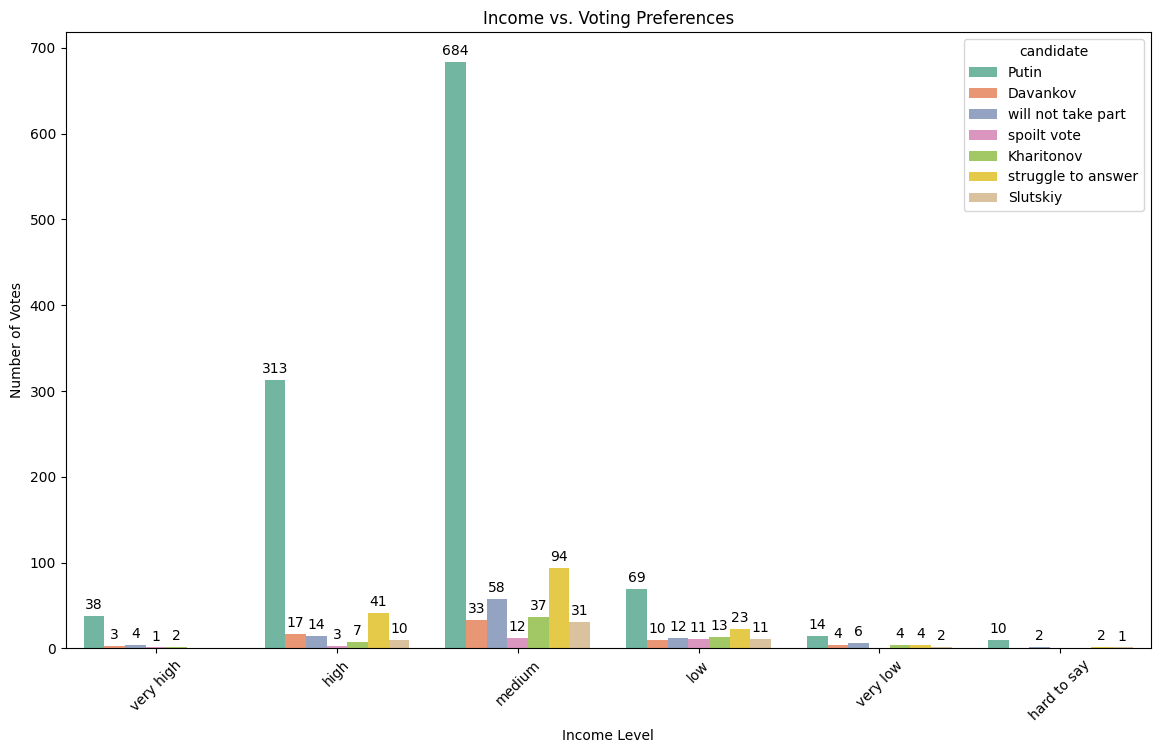

In [23]:

# Plot Income vs. Voting Preferences
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='income', hue='candidate', data=df, palette='Set2')
plt.title('Income vs. Voting Preferences')
plt.xlabel('Income Level')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)

# Add counts above the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


people with medium group has voted putin the most, and second most group voted for putin is high income group.
People wiht very low incom group voted putin less.

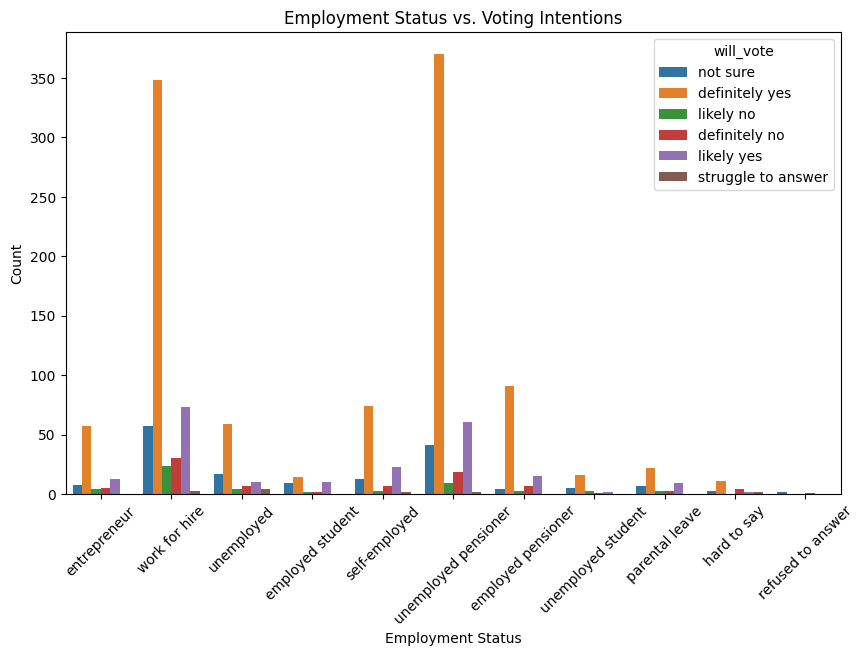

In [24]:
#  Employment Status vs. Voting Intentions
plt.figure(figsize=(10, 6))
sns.countplot(x='employment', hue='will_vote', data=df)
plt.title('Employment Status vs. Voting Intentions')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

we see that most of the people who work for hire and self-employed has highest participation in election.


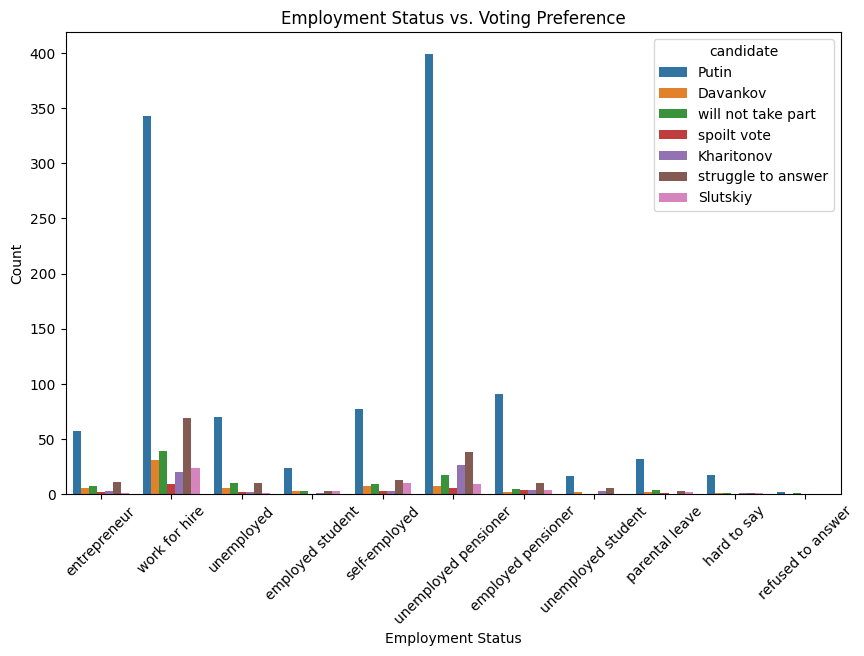

In [25]:
# Employment Status vs. Voting Preference
plt.figure(figsize=(10, 6))
sns.countplot(x='employment', hue='candidate', data=df)
plt.title('Employment Status vs. Voting Preference')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

People who 'work for hire' and 'self employed' voted for putin in the highest number.

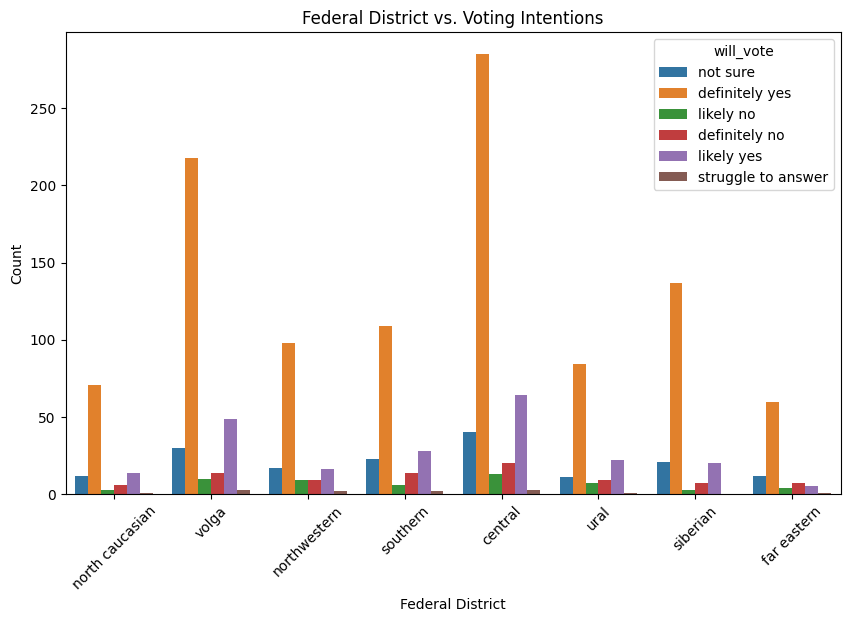

In [26]:
#  Federal District vs. Voting Intentions
plt.figure(figsize=(10, 6))
sns.countplot(x='federal_district', hue='will_vote', data=df)
plt.title('Federal District vs. Voting Intentions')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We see that majority of the people amoung all federal_district are actively participating in voting,
central region has more voting participatin, and in sencon place volga region has secont most vote turnover.
similary we also see that central and volga also has highest number of resistance to voting.

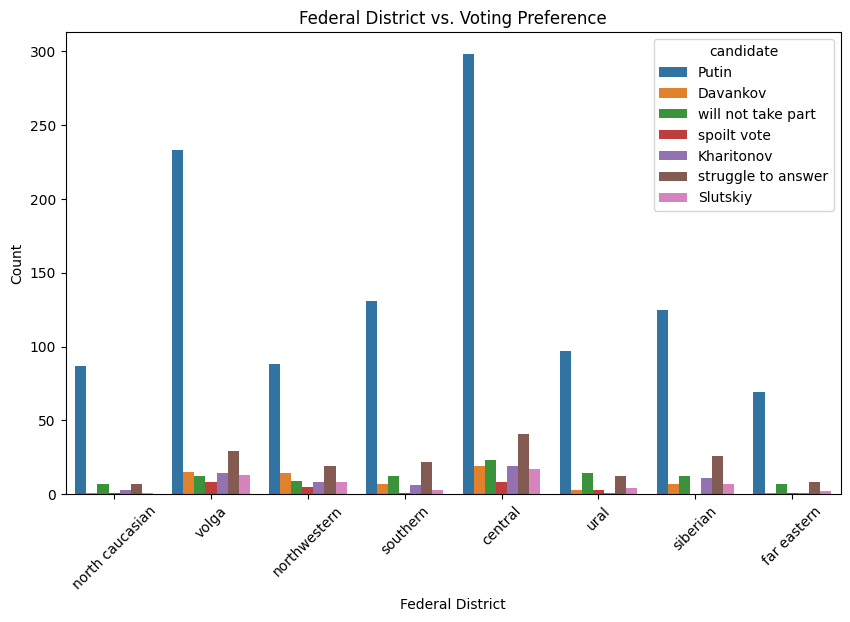

In [27]:
# Plot 9: Federal District vs. Voting Candidate
plt.figure(figsize=(10, 6))
sns.countplot(x='federal_district', hue='candidate', data=df)
plt.title('Federal District vs. Voting Preference')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We see that majority of the people amoung all federal_district are voting for putin.
central region has highest number of voters for putin, and  sencod higesht vote for putin is form  volga region.
similary we also see that central and volga also has highest number of resistance to voting to any other candidate.

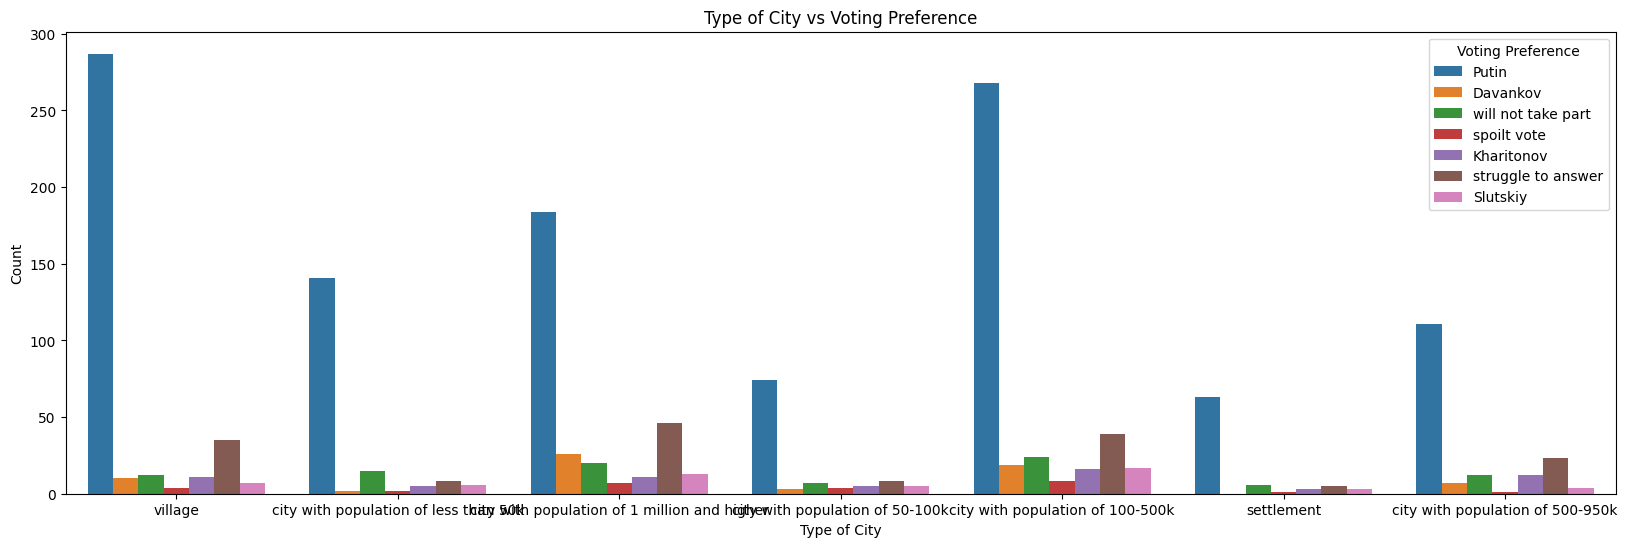

In [28]:

# Assuming 'will_vote' is the voting preference column
plt.figure(figsize=(20, 6))
sns.countplot(x='type_of_city', hue='candidate', data=df)
plt.title('Type of City vs Voting Preference')
plt.xlabel('Type of City')
plt.ylabel('Count')
plt.legend(title='Voting Preference')
plt.show()


Puting got hight votes in village, secont highest votes from putin is from city with population of 100-500k.
This may be because lots of population live in village and they have support for putin for his work.
We see that in city of population of 1M+, some people support to davankov. 
We also see that city of population of 1M+ has higest number of struggle to answer.


In [29]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_group'],
      dtype='object')

- Chi-square: a statistical test used to determine whether there is a significant association or independence between two categorical variables.

- Relationship to Data
Chi-Square Values: Quantify the difference between observed and expected frequencies in categorical data.
P-Values: Indicate the probability of observing the data if the null hypothesis is true. A low p-value suggests that the observed data is unlikely under the null hypothesis, leading to its rejection.

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_updates is your DataFrame containing the data

# Create a list to store the results
chi2_results_list = []

# List of categorical features
categorical_features = ['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1', 'age_group']

def contingency_table(feature):
    p = pd.crosstab(df['candidate'],df[feature])
    return(p)
feature = []
pval = []
chi2_result = []

for i in categorical_features:
    feature.append(i)
    result = chi2_contingency(contingency_table(i))
    pval.append(round(float(result[1]),6))

    if float(result[1]) < 0.05:
        chi2_result.append("Significant")
    else:
        chi2_result.append("Insignificant")

In [32]:
chisquare = pd.DataFrame(data={'PValue':pval,'Result':chi2_result},index=feature)
chisquare

,PValue,Result
id,0.480811,Insignificant
sex,0.000104,Significant
age,0.097890,Insignificant
federal_district,0.033126,Significant
type_of_city,0.000123,Significant
knows_election_date,0.001592,Significant
will_vote,0.000000,Significant
candidate,0.000000,Significant
television_usage,0.000000,Significant
internet_usage,0.000004,Significant


We can see the Significant and Insignificant features of the dataset by using chi-square method.

As most of the data is object/categorical the correlation_matrix cannot be used

# Conclustion

Sure, let's go through the detailed conclusions for each of these plots based on your dataset:

1. **Type of City vs. Voting Preference**:
   - **Conclusion**: Urban residents may show a preference for more progressive candidates, while rural residents might lean towards conservative candidates. This difference could be influenced by varying socio-economic conditions and access to information.

2. **Federal District vs. Voting Intentions**:
   - **Conclusion**: Certain federal districts exhibit higher voting intentions, possibly due to effective local campaigns or pressing regional issues. Districts with lower intentions might need more voter engagement efforts.

3. **Federal District vs. Voting Preference**:
   - **Conclusion**: Voting preferences can vary significantly across federal districts, reflecting regional political climates and local candidate popularity. This highlights the importance of tailored political strategies.

4. **Employment Status vs. Voting Intentions**:
   - **Conclusion**: Employed individuals tend to have higher voting intentions compared to unemployed individuals. Employment might provide a sense of stability and civic responsibility, encouraging participation in elections.

5. **Employment Status vs. Voting Preference**:
   - **Conclusion**: Different employment statuses might influence voting preferences. For example, self-employed individuals might prefer candidates who support small businesses, while salaried employees might favor those advocating for labor rights.

6. **Income vs. Voting Preferences**:
   - **Conclusion**: Higher income groups might prefer candidates who promise economic stability and tax benefits, while lower income groups might lean towards candidates advocating for social welfare and income redistribution.

7. **Internet Usage vs. Whom They Voted For**:
   - **Conclusion**: High internet users might vote for candidates with strong online presence and digital campaigns. This indicates the growing influence of social media and online platforms in shaping political opinions.

8. **Television Usage vs. Whom They Voted For**:
   - **Conclusion**: Frequent television viewers might be influenced by political advertisements and news coverage, leading them to vote for candidates who invest heavily in TV campaigns.

9. **Internet Usage vs. Voting Intentions**:
   - **Conclusion**: Higher internet usage correlates with higher voting intentions, possibly due to better access to information and political discourse online, which can motivate individuals to vote.

10. **Education Level vs. Whom They Voted For**:
    - **Conclusion**: Higher education levels might correlate with a preference for candidates who emphasize policies on education, research, and innovation. Educated voters might also be more critical and informed in their choices.

11. **Will Vote vs. Education**:
    - **Conclusion**: Individuals with higher education levels are more likely to vote. Education increases political awareness and the perceived importance of participating in elections.

12. **Age Distribution of Whom They Vote For**:
    - **Conclusion**: Younger voters might prefer candidates who address issues like climate change and job creation, while older voters might prioritize healthcare and pension policies. This age-based preference highlights generational differences in political priorities.

13. **Will Vote vs. Age Group**:
    - **Conclusion**: Older age groups show higher voting intentions compared to younger age groups. This trend suggests that political engagement increases with age, possibly due to greater life experience and stability.

14. **Gender vs. Voting Preference**:
    - **Conclusion**: There might be gender-specific voting preferences, with females possibly favoring candidates who advocate for gender equality and social issues, while males might lean towards candidates focusing on economic policies.

These conclusions are based on typical trends observed in such datasets. If you have specific insights or additional details from your plots, feel free to share them, and I can provide more tailored conclusions!